In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
#import mpld3
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import filter_output_reader as freader
from importlib import reload


import scipy.stats as stats

%matplotlib inline

In [2]:
run_test_set = 1
if (run_test_set == 0):
    example_datafile = '../python/const_stress_example_data.txt'
    filter_config = '../cpp/connectivity_8.txt'
    output_data = '../cpp/const_stress_output.txt'
elif (run_test_set == 1):
    example_datafile = '../python/varying_stress_example_data.txt'
    filter_config = '../cpp/connectivity_8.txt'
    output_data = '../cpp/varying_stress_output.txt'
elif (run_test_set == 2):
    example_datafile = '../python/varying_stress_example_data_2.txt'
    filter_config = '../cpp/connectivity_8.txt'
    output_data = '../cpp/varying_stress_output_2.txt'

In [3]:
reload(freader)
dns_data = freader.read_dns_data(example_datafile)
nodes, conn = freader.read_filter_configuration(filter_config)
filter_result = freader.read_output_data(output_data)

Reading data from:   ../python/varying_stress_example_data.txt
Filter defined in:   ./connectivity_8.txt


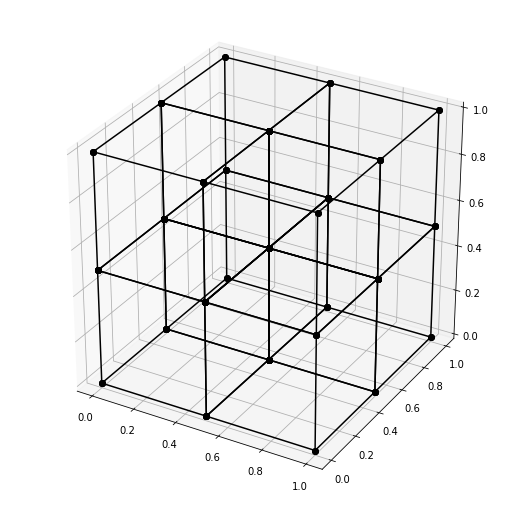

In [4]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
eid = 1
freader.plot_hex(1, nodes, conn, ax)
freader.plot_hex(2, nodes, conn, ax)
freader.plot_hex(3, nodes, conn, ax)
freader.plot_hex(4, nodes, conn, ax)
freader.plot_hex(5, nodes, conn, ax)
freader.plot_hex(6, nodes, conn, ax)
freader.plot_hex(7, nodes, conn, ax)
freader.plot_hex(8, nodes, conn, ax)
plt.savefig('filter_8_initial.pdf')
#freader.plot_filter_cgs(10, 0, filter_result, ax)
#freader.plot_filter_cgs(2, 0, filter_result, ax)

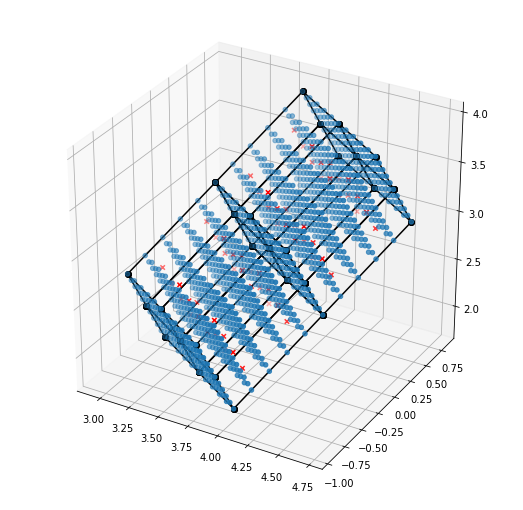

In [5]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

#eid = 10
#t = 0.0
#freader.plot_hex_filter(eid, t, filter_result, ax)
#freader.plot_filter_cgs(eid, t, filter_result, ax)
#eid = 2
#t = 0.0
#freader.plot_hex_filter(eid, t, filter_result, ax)
#freader.plot_filter_cgs(eid, t, filter_result, ax)

t = 1

eid = 1
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)
eid = 2
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)
eid = 3
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)
eid = 4
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)
eid = 5
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)
eid = 6
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)
eid = 7
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)
eid = 8
freader.plot_hex_filter(eid, t, filter_result, ax)
freader.plot_filter_cgs(eid, t, filter_result, ax)
ax.scatter(*zip(*dns_data[t]))

#eid = 10
#t = 1.0
##ax.scatter(*zip(*dns_data[t]))
#freader.plot_hex_filter(eid, t, filter_result, ax)
#freader.plot_filter_cgs(eid, t, filter_result, ax)

plt.savefig('filter_8_final.pdf')

In [6]:
tmp = filter_result[1][1].dof_values[0,3:]


D = np.array([[tmp[0], tmp[5], tmp[4]],\
              [tmp[8], tmp[1], tmp[3]],\
              [tmp[7], tmp[6], tmp[2]]])

Csq = np.matmul(D.T, D)
Csq

array([[ 3.62861224, -0.52581846, -2.3403413 ],
       [-0.52581846,  1.57060021, -0.52973999],
       [-2.3403413 , -0.52973999,  2.23487899]])

In [7]:
np.random.seed(123)
X = np.random.rand(9).reshape((3, 3))
print("X:\n",X)
A = X.dot(X)
print("A:\n",A)

Xs = freader.matsqrt(A)
np.allclose(Xs.dot(Xs), A)

X:
 [[0.69646919 0.28613933 0.22685145]
 [0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319 ]]
A:
 [[0.86530995 0.56051022 0.38816255]
 [1.19559529 0.96514433 0.63296392]
 [1.53230958 1.10270543 0.74353916]]


/projects/nathanm/micromorphic/micromorphic_library/overlap_coupling/src/python/filter_output_reader.py:607: RuntimeWarning: invalid value encountered in true_divide
  Jest[:, i] = (Rpi-R)/np.linalg.norm(Xf - Xf*delta)


True

In [8]:
A = X.T.dot(X)
print(A, np.linalg.matrix_rank(A))
Xs = freader.matsqrt(A, mode=2)
np.allclose(Xs.T.dot(Xs), A)

[[1.75091571 1.26759759 0.86294068]
 [1.26759759 1.06850309 0.69867956]
 [0.86294068 0.69867956 0.46177615]] 3


True

In [9]:
A = X.dot(X.T)
print(A, np.linalg.matrix_rank(A))
Xs = freader.matsqrt(A, mode=3)
np.allclose(Xs.dot(Xs.T), A)

[[0.61840663 0.68582444 0.98812887]
 [0.68582444 1.00060265 1.23690893]
 [0.98812887 1.23690893 1.66218568]] 3


True

In [10]:
freader.matsqrt(Csq, mode=2)

array([[ 1.68361822, -0.2794501 , -0.84613804],
       [-0.2794501 ,  1.17802648, -0.32366876],
       [-0.84613804, -0.32366876,  1.18918793]])

In [11]:
filter_result[1][1]

MicromorphicFilterData:
 nodes:
   +3.2000 -0.5000 +2.0000
   +3.5535 +0.1622 +2.6687
   +3.4192 +0.1296 +2.9702
   +3.0657 -0.5326 +2.3015
   +3.6090 -0.6916 +1.9044
   +3.9625 -0.0294 +2.5731
   +3.8281 -0.0620 +2.8746
   +3.4747 -0.7243 +2.2059
 dof values:
   +3.2000 -0.5000 +2.0000 -0.2931 -1.0653 -1.1912 -0.3832 +0.8180 -0.2686 +0.6030 +1.3374 +1.3244
   +3.0535 +0.1622 +2.6687 -0.2931 -1.0653 -1.1912 -0.3832 +0.8180 -0.2686 +0.6030 +1.3374 +1.3244
   +2.9192 -0.3704 +2.9702 -0.2931 -1.0653 -1.1912 -0.3832 +0.8180 -0.2686 +0.6030 +1.3374 +1.3244
   +3.0657 -1.0327 +2.3015 -0.2931 -1.0653 -1.1912 -0.3832 +0.8180 -0.2686 +0.6030 +1.3374 +1.3244
   +3.6090 -0.6916 +1.4044 -0.2931 -1.0653 -1.1912 -0.3832 +0.8180 -0.2686 +0.6030 +1.3374 +1.3244
   +3.4625 -0.0294 +2.0731 -0.2931 -1.0653 -1.1912 -0.3832 +0.8180 -0.2686 +0.6030 +1.3374 +1.3244
   +3.3281 -0.5620 +2.3746 -0.2931 -1.0653 -1.1912 -0.3832 +0.8180 -0.2686 +0.6030 +1.3374 +1.3244
   +3.4747 -1.2243 +1.7059 -0.2931 -1.0653 -1.

In [12]:
def get_expected_normal_area(filter_t0, filter_t, gp, f):
    D = freader.from_voigt(filter_t.dof_values[gp][3:]) + np.eye(3)
    N = filter_t0.gauss_point_info.surface_normal[gp][f]
    dA = filter_t0.gauss_point_info.surface_area[gp][f]
    jd = np.linalg.det(D)
    Dinv = np.linalg.inv(D)
    
    dan = jd*dA*Dinv.T.dot(N)
    da = np.linalg.norm(dan)
    n = dan/da
    return n, da

get_expected_normal_area(filter_result[0][4], filter_result[1][4], 0, 0)

(array([-0.46110064, -0.83651346, -0.29602606]), 0.03301287607683754)

In [13]:
def get_tractions(filter_t, gp, f):
    n = filter_t.gauss_point_info.surface_normal[gp][f]
    print(n)
    Sv = filter_t.gauss_point_info.symmetric_microstress[gp]
    Cv = filter_t.gauss_point_info.cauchy_stress[gp]
    Hv = filter_t.gauss_point_info.ho_stress[gp]
    
    S = np.array([[Sv[0], Sv[5], Sv[4]],\
                  [Sv[8], Sv[1], Sv[3]],\
                  [Sv[7], Sv[6], Sv[2]]])
    
    C = np.array([[Cv[0], Cv[5], Cv[4]],\
                  [Cv[8], Cv[1], Cv[3]],\
                  [Cv[7], Cv[6], Cv[2]]])
    
    print(S, "\n", C)
    
    H = np.zeros([3, 3, 3])
    for i in range(3):
        H[i] = np.array([[Hv[9*i+0], Hv[9*i+5], Hv[9*i+4]],\
                         [Hv[9*i+8], Hv[9*i+1], Hv[9*i+3]],\
                         [Hv[9*i+7], Hv[9*i+6], Hv[9*i+2]]])
    
    tS = np.zeros((3,))
    tC = np.zeros((3,))
    tH = np.zeros((3, 3))
    for i in range(3):
        for j in range(3):
            tS[i] += n[j]*S[j, i]
            tC[i] += n[j]*C[j, i]
            
            for k in range(3):
                tH[i, j] += n[k]*H[k, i, j]
    return tS, tC, tH

get_tractions(filter_result[1][4], 0, 2)

[-0.723887  0.641854 -0.253005]
[[ 2.36652  -1.09721   0.532592]
 [-1.09721   1.09957   0.922476]
 [ 0.532592  0.922476 -0.226099]] 
 [[ 2.40526  -1.03013   0.588871]
 [-1.02671   1.22168   1.02492 ]
 [ 0.601474  1.04178  -0.126008]]


(array([-2.55209013,  1.26662842,  0.26376266]),
 array([-2.5523103 ,  1.26626236,  0.26345359]),
 array([[-1.75122911e-04, -2.34028249e-04, -3.54163063e-04],
        [-5.50104069e-05,  6.39492555e-05,  2.50802236e-04],
        [-8.25081531e-05, -1.98693500e-04, -7.13689843e-05]]))

In [14]:
u = filter_result[1][4].dof_values[0][:3]
phi_ = filter_result[1][4].dof_values[0][3:]

phi = np.array([[phi_[0], phi_[5], phi_[4]],\
                [phi_[8], phi_[1], phi_[3]],\
                [phi_[7], phi_[6], phi_[2]]])

chi = phi + np.eye(3)

C = freader.matsqrt(chi.T.dot(chi), mode=1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f7c603835c0>)

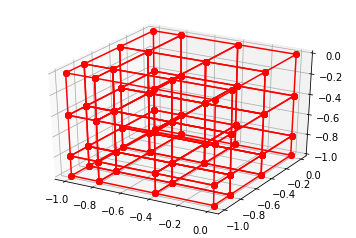

In [15]:
import python_plot as pp
data = pp.read_gnu_data('../cpp/temp.gnu')
pp.plot_3d(data)

In [16]:
import sympy
sympy.init_printing()

zero = sympy.S(0)

normal_str = 'n1 n2 n3'
normal = sympy.symbols(normal_str)

micro_stress_str = "sigma11 sigma22 sigma33 sigma23 sigma13 sigma12"
micro_stress_vec = sympy.symbols(micro_stress_str)
micro_stress = [[micro_stress_vec[0], micro_stress_vec[5], micro_stress_vec[4]],\
                [micro_stress_vec[5], micro_stress_vec[1], micro_stress_vec[3]],\
                [micro_stress_vec[4], micro_stress_vec[3], micro_stress_vec[2]]]

traction = [zero for _ in range(3)]

for i in range(3):
    for j in range(3):
        traction[i] += normal[j]*micro_stress[j][i]
        
traction

for i in range(3):
    outstr = "traction[{0}] = ".format(i)

    for j, n in enumerate(normal):
        term = sympy.diff(traction[i], n)
        
        for k, s in enumerate(micro_stress_vec):
            if (sympy.diff(term, s) != 0):
                outstr += "itiM->second.das[j][{0}]*micro_tensor[{1}]+".format(j, k)
        
    outstr = outstr[:-1] + ";"
    
    
    print(outstr)
traction

traction[0] = itiM->second.das[j][0]*micro_tensor[0]+itiM->second.das[j][1]*micro_tensor[5]+itiM->second.das[j][2]*micro_tensor[4];
traction[1] = itiM->second.das[j][0]*micro_tensor[5]+itiM->second.das[j][1]*micro_tensor[1]+itiM->second.das[j][2]*micro_tensor[3];
traction[2] = itiM->second.das[j][0]*micro_tensor[4]+itiM->second.das[j][1]*micro_tensor[3]+itiM->second.das[j][2]*micro_tensor[2];


In [17]:
xi_str = 'xi1 xi2 xi3'
xi = sympy.symbols(xi_str)
couple_traction = [[zero for _ in range(3)] for __ in range(3)]

for j in range(3):
    for k in range(3):
        for i in range(3):
            couple_traction[j][k] += normal[i]*micro_stress[i][j]*xi[k]
            
def to_voigt(matrix):
    order = [(0, 0), (1, 1), (2, 2), (1, 2), (0, 2), (0, 1), (2, 1), (2, 0), (1, 0)]
    
    return [matrix[o[0]][o[1]] for o in order]
        
    
voigt_couple_traction = to_voigt(couple_traction)

for indx, vct in enumerate(voigt_couple_traction):
    outstr = "                    couple_traction[{0}] = ".format(indx)
    for i, n in enumerate(normal):
        term = sympy.diff(vct, n)
        if (term != zero):
            outstr += "itiM->second.das[j][{0}]".format(i)
            for j, s in enumerate(micro_stress_vec):
                term2 = sympy.diff(term, s)
                if (term2 != zero):
                    outstr += "*itv->second[{0}]".format(j)
                    
                    for k, xik in enumerate(xi):
                        term3 = sympy.diff(term2, xik)
                        if (term3 != zero):
                            outstr += "*xi[{0}]\n".format(k)
            outstr += "                                       + "
    last = outstr.rfind("\n")
    outstr = outstr[:last] + ";\n"
    print(outstr)
                


                    couple_traction[0] = itiM->second.das[j][0]*itv->second[0]*xi[0]
                                       + itiM->second.das[j][1]*itv->second[5]*xi[0]
                                       + itiM->second.das[j][2]*itv->second[4]*xi[0];

                    couple_traction[1] = itiM->second.das[j][0]*itv->second[5]*xi[1]
                                       + itiM->second.das[j][1]*itv->second[1]*xi[1]
                                       + itiM->second.das[j][2]*itv->second[3]*xi[1];

                    couple_traction[2] = itiM->second.das[j][0]*itv->second[4]*xi[2]
                                       + itiM->second.das[j][1]*itv->second[3]*xi[2]
                                       + itiM->second.das[j][2]*itv->second[2]*xi[2];

                    couple_traction[3] = itiM->second.das[j][0]*itv->second[5]*xi[2]
                                       + itiM->second.das[j][1]*itv->second[1]*xi[2]
                                       + itiM->second.das[j

In [18]:
voigt_couple_traction[3]

In [19]:
ntmp = np.array([1, 0, 0])
stmp = np.diag([2, -1, 3])

ttmp = np.zeros([3,])

for i in range(3):
    for j in range(3):
        ttmp[i] += ntmp[j]*stmp[j,i]
print(ttmp)
xi = np.array([0.125, 0, 0])

ctmp = np.zeros([3, 3])
for i in range(3):
    for j in range(3):
        ctmp[i][j] = ttmp[i]*xi[j]
ctmp

[2. 0. 0.]


array([[0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  ]])

In [20]:
ntmp = -ntmp
ttmp = np.zeros([3,])

for i in range(3):
    for j in range(3):
        ttmp[i] += ntmp[j]*stmp[j,i]
print(ttmp)

xi = -np.array([0.125, 0, 0])

ctmp = np.zeros([3, 3])
for i in range(3):
    for j in range(3):
        ctmp[i][j] = ttmp[i]*xi[j]
ctmp


[-2.  0.  0.]


array([[ 0.25,  0.  ,  0.  ],
       [-0.  , -0.  , -0.  ],
       [-0.  , -0.  , -0.  ]])

In [21]:
ms = {}
cs = {}
msv = {}
csv = {}

for t in filter_result.keys():
    ms.update({t:{}})
    msv.update({t:{}})
    cs.update({t:{}})
    csv.update({t:{}})
    
    for fkey in filter_result[t].keys():
        ms[t].update({fkey:[]})
        cs[t].update({fkey:[]})
        msv[t].update({fkey:[]})
        csv[t].update({fkey:[]})
        
        
        for index, (c_stress, ho_stress) in enumerate(zip(filter_result[t][fkey].gauss_point_info.cauchy_stress, filter_result[t][fkey].gauss_point_info.ho_stress)):
            ms[t][fkey].append(np.copy(ho_stress))
            cs[t][fkey].append(np.copy(c_stress))
            
            msv[t][fkey].append(filter_result[t][fkey].gauss_point_info.ho_stress_variation[index])
            csv[t][fkey].append(filter_result[t][fkey].gauss_point_info.cauchy_stress_variation[index])

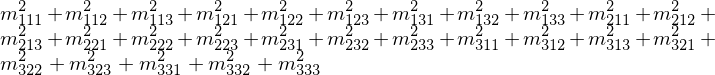

In [22]:
import sympy
order = ['11','22','33','23','13','12', '32','31','21']

m_str = ''
for i in range(3):
    for o in order:
        m_str += "m{0:d}{1} ".format(i+1, o)
m_str = m_str[:-1]

m_vec = sympy.symbols(m_str)

zero = sympy.S(0)

m = [[[zero for _ in range(3)] for __ in range(3)] for ___ in range(3)]

for mijk in m_vec:
    mijk_int = int(mijk.name[1:])
    i = int(mijk_int/100)
    j = int((mijk_int - i*100)/10)
    k = int(mijk_int - i*100 - j*10)
    
    m[i-1][j-1][k-1] = mijk
    
mnorm = zero

for i in range(3):
    for j in range(3):
        for k in range(3):
            mnorm += m[i][j][k]*m[i][j][k]
mnorm

In [23]:
def signed_norm(v):
    val = sum([np.sign(vi)*vi**2 for vi in v])
    return np.sign(val)*np.sqrt(abs(val))
    

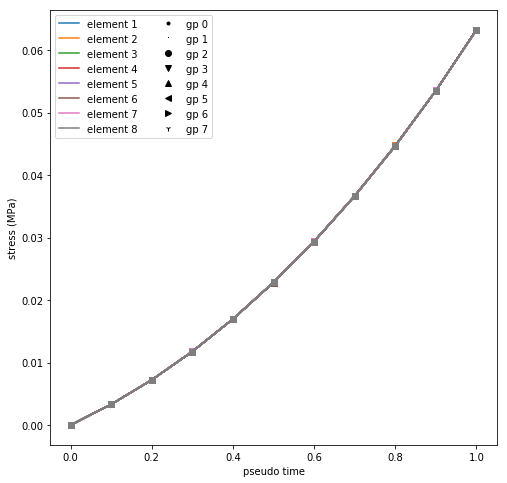

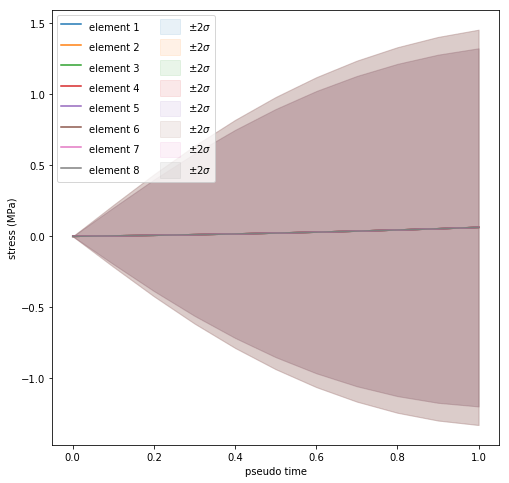

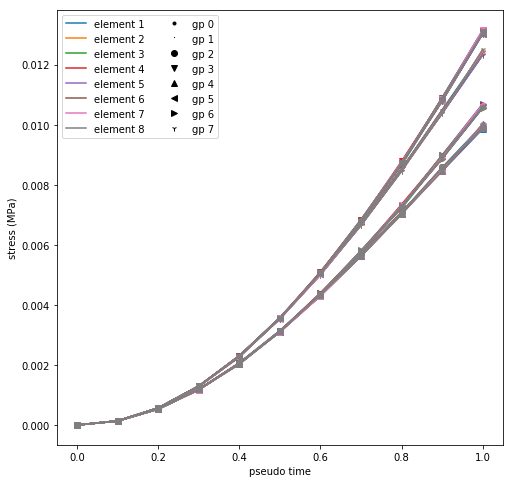

In [24]:
from matplotlib import lines
from matplotlib.legend import Legend
import matplotlib.patches as mpatches
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ts = [t for t in filter_result.keys()]

m_norms = dict([(fkey, [[] for _ in range(8)]) for fkey in filter_result[0].keys()])
c_av_norm = dict([(fkey, [[] for _ in range(8)]) for fkey in filter_result[0].keys()])
std_m_norms = dict([(fkey, [[] for _ in range(8)]) for fkey in filter_result[0].keys()])

for t in filter_result.keys():
    for fkey in filter_result[t].keys():
        for index, ho_stress in enumerate(ms[t][fkey]):
            #m_norms[fkey][index].append(np.linalg.norm(ho_stress))
            m_norms[fkey][index].append(signed_norm(ho_stress))
            std_m_norms[fkey][index].append(np.std(np.linalg.norm(msv[t][fkey][index], axis=1)))
            #print(m_norms[fkey][index])
            #print(std_m_norms[fkey][index])
            #raise
            
            c = freader.from_voigt(cs[t][fkey][index])
            c_asymm = 0.5*(c - c.T)
            c_av_norm[fkey][index].append(np.sqrt(c_asymm[1,2]**2 + c_asymm[2, 0]**2 + c_asymm[0, 1]**2))
            #c_av_norm[fkey][index].append(signed_norm([c_asymm[1,2], c_asymm[2, 0], c_asymm[0, 1]]))
            
e_colors = dict([(fkey, c) for fkey, c in zip(m_norms, plt.rcParams['axes.prop_cycle'].by_key()['color'])])
gp_styles = [v for v in lines.lineMarkers.keys()]
    
c_handles = []
m_handles = []
ngp = 8
for fkey in m_norms.keys():
    c_handles.append(lines.Line2D([], [], color=e_colors[fkey], label="element {0}".format(fkey)))
    for i, gp in enumerate(m_norms[fkey]):
        ax.plot(ts, gp, color=e_colors[fkey], marker=gp_styles[i])
        
m_handles = [lines.Line2D([], [], markerfacecolor='k', color='none', label='gp {0}'.format(i), marker=m) for i, m in enumerate(gp_styles[:ngp])]
        
ax.legend(handles=c_handles+m_handles, ncol=2)
ax.set_xlabel('pseudo time')
ax.set_ylabel('stress (MPa)')

plt.savefig('norm_of_ho_stress_gpts.pdf')
        
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
s_handles = []
for fkey in m_norms.keys():
    mean = np.mean(m_norms[fkey], axis=0)
    #std = np.std(m_norms[fkey], axis=0)
    std = np.array(std_m_norms[fkey][0])
    #print(len(std))
    ax.plot(ts, np.mean(m_norms[fkey], axis=0), color=e_colors[fkey], label=r'element {0}'.format(fkey))
    ax.fill_between(x = ts, y1=mean-2*std, y2=mean+2*std, color=e_colors[fkey], alpha=0.1)
    s_handles.append(mpatches.Patch(color=e_colors[fkey], alpha=0.1, label=r'$\pm 2\sigma$'))


    
ax.legend(handles=c_handles + s_handles, loc='upper left', ncol=2, handleheight=2.0)
ax.set_xlabel('pseudo time')
ax.set_ylabel('stress (MPa)')
plt.savefig('norm_of_ho_stress_filled.pdf')

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

for fkey in c_av_norm.keys():
    
    for i, gp in enumerate(c_av_norm[fkey]):
        ax.plot(ts, gp, color=e_colors[fkey], marker=gp_styles[i])
        
ax.legend(handles=c_handles+m_handles, ncol=2)
ax.set_xlabel('pseudo time')
ax.set_ylabel('stress (MPa)')
plt.savefig('norm_of_cauchy_av.pdf')

In [25]:
filter_result[1][1].gauss_point_info

Gauss Point Information
 Volumes:   0.0151 0.0151 0.0151 0.0151 0.0151 0.0151 0.0151 0.0151
 Densities: 2700.0000 2700.0000 2700.0000 2700.0000 2700.0000 2700.0000 2700.0000 2700.0000
 Local Mass Centers:
   -0.5000 -0.5000 -0.5000
   +0.5000 -0.5000 -0.5000
   +0.5000 +0.5000 -0.5000
   -0.5000 +0.5000 -0.5000
   -0.5000 -0.5000 +0.5000
   +0.5000 -0.5000 +0.5000
   +0.5000 +0.5000 +0.5000
   -0.5000 +0.5000 +0.5000
 Global Mass Centers:
   +3.3570 -0.3905 +2.2186
   +3.5338 -0.0594 +2.5530
   +3.4666 -0.0757 +2.7037
   +3.2899 -0.4068 +2.3694
   +3.5615 -0.4863 +2.1709
   +3.7383 -0.1552 +2.5052
   +3.6711 -0.1715 +2.6559
   +3.4944 -0.5026 +2.3216
 Surface Areas:
    0 : 0.0330
    1 : 0.1154
    2 : 0.0765
    7 : 0.0330
    9 : 0.1154
   10 : 0.0765

    1 : 0.1154
    2 : 0.0765
    5 : 0.0330
    6 : 0.0330
    8 : 0.1154
   11 : 0.0765

    2 : 0.0765
    4 : 0.1154
    5 : 0.0330
    7 : 0.1154
    9 : 0.0330
   12 : 0.0765

    0 : 0.0330
    2 : 0.0765
    4 : 0.1154
    6 :

In [26]:
from matplotlib import lines
lines.lineMarkers.keys()

dict_keys(['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', ''])

In [27]:
fc = open('../cpp/ho_constraint.txt', 'r')
fc.readline()

C = np.empty([0, 27*8])
d = np.empty([0, 1])

setd = False

for line in fc.readlines():
    if ('d' in line):
        setd = True
        continue
    if (setd):
        d = np.vstack([d, float(line.strip())])
    else:
        C = np.vstack([C, [float(l.strip()) for l in line.split()]])

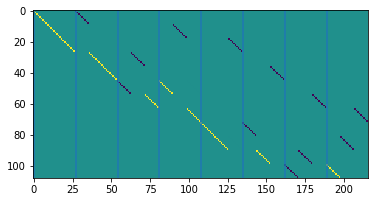

In [28]:
plt.imshow(C)
[plt.axvline(27*i) for i in range(8)]

In [29]:
fc = open('../cpp/hostress_A.txt', 'r')

A = np.empty([0, 27*8])
for line in fc.readlines():
    A = np.vstack([A, [float(l.strip()) for l in line.split()]])

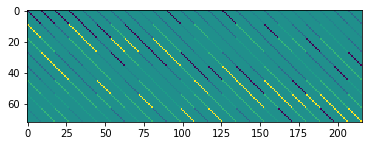

In [30]:
plt.imshow(A)

In [31]:
A.shape[0] + C.shape[0]

In [32]:
filter_result[1][1]

MicromorphicFilterData:
 nodes:
   +3.2000 -0.5000 +2.0000
   +3.5535 +0.1622 +2.6687
   +3.4192 +0.1296 +2.9702
   +3.0657 -0.5326 +2.3015
   +3.6090 -0.6916 +1.9044
   +3.9625 -0.0294 +2.5731
   +3.8281 -0.0620 +2.8746
   +3.4747 -0.7243 +2.2059
 dof values:
   +3.2000 -0.5000 +2.0000 -0.2931 -1.0653 -1.1912 -0.3832 +0.8180 -0.2686 +0.6030 +1.3374 +1.3244
   +3.0535 +0.1622 +2.6687 -0.2931 -1.0653 -1.1912 -0.3832 +0.8180 -0.2686 +0.6030 +1.3374 +1.3244
   +2.9192 -0.3704 +2.9702 -0.2931 -1.0653 -1.1912 -0.3832 +0.8180 -0.2686 +0.6030 +1.3374 +1.3244
   +3.0657 -1.0327 +2.3015 -0.2931 -1.0653 -1.1912 -0.3832 +0.8180 -0.2686 +0.6030 +1.3374 +1.3244
   +3.6090 -0.6916 +1.4044 -0.2931 -1.0653 -1.1912 -0.3832 +0.8180 -0.2686 +0.6030 +1.3374 +1.3244
   +3.4625 -0.0294 +2.0731 -0.2931 -1.0653 -1.1912 -0.3832 +0.8180 -0.2686 +0.6030 +1.3374 +1.3244
   +3.3281 -0.5620 +2.3746 -0.2931 -1.0653 -1.1912 -0.3832 +0.8180 -0.2686 +0.6030 +1.3374 +1.3244
   +3.4747 -1.2243 +1.7059 -0.2931 -1.0653 -1.

In [33]:
chi_str = 'chi11 chi22 chi33 chi23 chi13 chi12 chi32 chi31 chi21'
F_str = 'F11 F22 F33 F23 F13 F12 F32 F31 F21'
chi_v = sympy.symbols(chi_str)
F_v = sympy.symbols(F_str)

chi = [[zero for _ in range(3)] for __ in range(3)]
F = [[zero for _ in range(3)] for __ in range(3)]

for i, Fi in enumerate(F_v):
    ij = int(Fi.name[1:])
    i  = int(ij/10)
    j = int(ij - 10*i)
    F[i-1][j-1] = Fi
    
for i, chii in enumerate(chi_v):
    ij = int(chii.name[3:])
    i  = int(ij/10)
    j = int(ij - 10*i)
    chi[i-1][j-1] = chii
    
psi = [[zero for _ in range(3)] for __ in range(3)]

for i in range(3):
    for j in range(3):
        for k in range(3):
            psi[i][j] += F[k][i]*chi[k][j]

order =  [(0, 0), (1, 1), (2, 2), (1, 2), (0, 2), (0, 1), (2, 1), (2, 0), (1, 0)]
order_str = ['11','22','33','23','13','12','32','31','21']

psi_v = [psi[o[0]][o[1]] for o in order]

psi_v
    

In [34]:
outstr = ""
for index, psi_vi in enumerate(psi_v):
    outstr += "            Psi[com][{0}] = ".format(index)
    for F_vi in F_v:
        term = sympy.diff(psi_vi, F_vi)
        if (not (term == 0)):
            for chi_vi in chi_v:
                term2 = sympy.diff(term, chi_vi)
                if (not (term2 == 0)):
                    i = order_str.index(F_vi.name[1:])
                    j = order_str.index(chi_vi.name[3:])
                    
                    outstr += "deformation_gradient[com][{0}]*chi[com][{1}]+\n".format(i, j)
                    loutstr = len(outstr)
                    outstr += "                          "
    outstr = outstr[:loutstr-2] + ";\n"
print(outstr)

            Psi[com][0] = deformation_gradient[com][0]*chi[com][0]+
                          deformation_gradient[com][7]*chi[com][7]+
                          deformation_gradient[com][8]*chi[com][8];
            Psi[com][1] = deformation_gradient[com][1]*chi[com][1]+
                          deformation_gradient[com][5]*chi[com][5]+
                          deformation_gradient[com][6]*chi[com][6];
            Psi[com][2] = deformation_gradient[com][2]*chi[com][2]+
                          deformation_gradient[com][3]*chi[com][3]+
                          deformation_gradient[com][4]*chi[com][4];
            Psi[com][3] = deformation_gradient[com][1]*chi[com][3]+
                          deformation_gradient[com][5]*chi[com][4]+
                          deformation_gradient[com][6]*chi[com][2];
            Psi[com][4] = deformation_gradient[com][0]*chi[com][4]+
                          deformation_gradient[com][7]*chi[com][2]+
                          deformation_gradient[c

In [35]:
grad_chi_str = ""
for i in range(3):
    for o in order_str:
        grad_chi_str += "gradchi{0}{1} ".format(i+1, o)
grad_chi_v = sympy.symbols(grad_chi_str)

grad_chi = [[[zero for _ in range(3)] for __ in range(3)] for ___ in range(3)]

horder_str = []
for gcijk in grad_chi_v:
    ijk = int(gcijk.name[7:])
    horder_str.append(gcijk.name[7:])
    
    i = int(ijk/100)
    j = int((ijk - 100*i)/10)
    k = int(ijk - 100*i - 10*j)
    
    grad_chi[i-1][j-1][k-1] = gcijk

gamma = [[[zero for _ in range(3)] for __ in range(3)] for ___ in range(3)]

for i in range(3):
    for j in range(3):
        for k in range(3):
            for l in range(3):
                gamma[i][j][k] += F[l][i]*grad_chi[l][j][k]

gamma_vec = []

for i in range(3):
    for j, k in order:
        gamma_vec.append(gamma[i][j][k])



In [36]:
outstr = ""
for index, gamma_vi in enumerate(gamma_vec):
    outstr += "            Gamma[com][{0:2d}] = ".format(index)
    for F_vi in F_v:
        term = sympy.diff(gamma_vi, F_vi)
        if (not (term == 0)):
            for gradchi_vi in grad_chi_v:
                term2 = sympy.diff(term, gradchi_vi)
                if (not (term2 == 0)):
                    i = order_str.index(F_vi.name[1:])
                    j = horder_str.index(gradchi_vi.name[7:])
                    
                    outstr += "deformation_gradient[com][{0:2d}]*gradchi[com][{1:2d}]+\n".format(i, j)
                    loutstr = len(outstr)
                    outstr += "                             ".format(i, j)
    outstr = outstr[:loutstr-2] + ";\n"
print(outstr)

            Gamma[com][ 0] = deformation_gradient[com][ 0]*gradchi[com][ 0]+
                             deformation_gradient[com][ 7]*gradchi[com][18]+
                             deformation_gradient[com][ 8]*gradchi[com][ 9];
            Gamma[com][ 1] = deformation_gradient[com][ 0]*gradchi[com][ 1]+
                             deformation_gradient[com][ 7]*gradchi[com][19]+
                             deformation_gradient[com][ 8]*gradchi[com][10];
            Gamma[com][ 2] = deformation_gradient[com][ 0]*gradchi[com][ 2]+
                             deformation_gradient[com][ 7]*gradchi[com][20]+
                             deformation_gradient[com][ 8]*gradchi[com][11];
            Gamma[com][ 3] = deformation_gradient[com][ 0]*gradchi[com][ 3]+
                             deformation_gradient[com][ 7]*gradchi[com][21]+
                             deformation_gradient[com][ 8]*gradchi[com][12];
            Gamma[com][ 4] = deformation_gradient[com][ 0]*gradchi[com][ 4]+

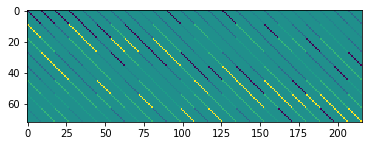

In [37]:
tmp = open('../cpp/Adata.txt')

A = []

for line in tmp.readlines():
    A.append([float(s.strip()) for s in line.split() if len(s.strip()) > 0])
    
A = np.array(A)

plt.imshow(A)

In [38]:
tmp = open('../cpp/bdata.txt')

b = []

for line in tmp.readlines():
    b.append([float(s.strip()) for s in line.split() if len(s.strip()) > 0])
    
b = np.array(b)

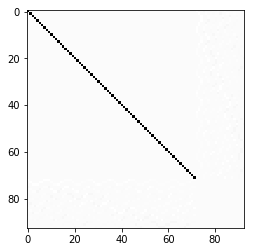

In [39]:
tmp = open('../cpp/Mtmp.txt')

Mcpp = []

for line in tmp.readlines():
    Mcpp.append([float(s.strip()) for s in line.split() if len(s.strip()) > 0])
    
Mcpp = np.array(Mcpp)

plt.imshow(Mcpp, cmap='binary')

In [40]:
M = np.matmul(A.T, A) + np.eye(A.shape[1])
np.linalg.matrix_rank(M)
x_minnorm = np.linalg.solve(M, np.matmul(A.T, b))
np.linalg.norm(x_minnorm)

In [41]:
x = np.linalg.lstsq(A, b)[0]
np.linalg.norm(x)#(A.dot(x) - b

/projects/nathanm/python_environments/pymc3_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [42]:
A

array([[-0.0175781,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       , -0.0175781,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       , -0.0175781, ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  0.0175781,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.0175781,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.0175781]])

In [43]:
dim = 9

x = []

num_nodes = 8
nstress = dim

for n in range(int(A.shape[0]/dim)):
    idel = [v for v in range(n*dim, (n+1)*dim)]
    Asub = np.delete(A, idel, axis=0)
    bsub = np.delete(b, idel, axis=0)
    
    M1 = np.hstack([np.eye(Asub.shape[1]), Asub.T])
    M2 = np.hstack([Asub, np.zeros((Asub.shape[0], Asub.shape[0]))])
    print(M1.shape, M2.shape)
    M = np.vstack([M1, M2])
    
    Asub2 = np.zeros([A.shape[0]-dim, A.shape[1]])
    
    if (n>0):
        Asub2[:n*nstress, :] = A[:n*nstress, :]
    if ((n+1)<num_nodes):
        print(A[(n+1)*nstress:, :].shape)
        Asub2[n*nstress:,:] = A[(n+1)*nstress:, :]
    
    rhs = np.vstack([np.zeros((Asub.shape[1], 1)), bsub])

    solsub = np.linalg.solve(M, rhs)
    
    xsub = solsub[:Asub.shape[1], :]
    x.append(xsub)
    
x = np.hstack(x)

xmean = np.mean(x, axis=1)
xmedian = np.median(x, axis=1)
xstd = np.std(x, axis=1)

(216, 279) (63, 279)
(63, 216)
(216, 279) (63, 279)
(54, 216)
(216, 279) (63, 279)
(45, 216)
(216, 279) (63, 279)
(36, 216)
(216, 279) (63, 279)
(27, 216)
(216, 279) (63, 279)
(18, 216)
(216, 279) (63, 279)
(9, 216)
(216, 279) (63, 279)


(216, 8)


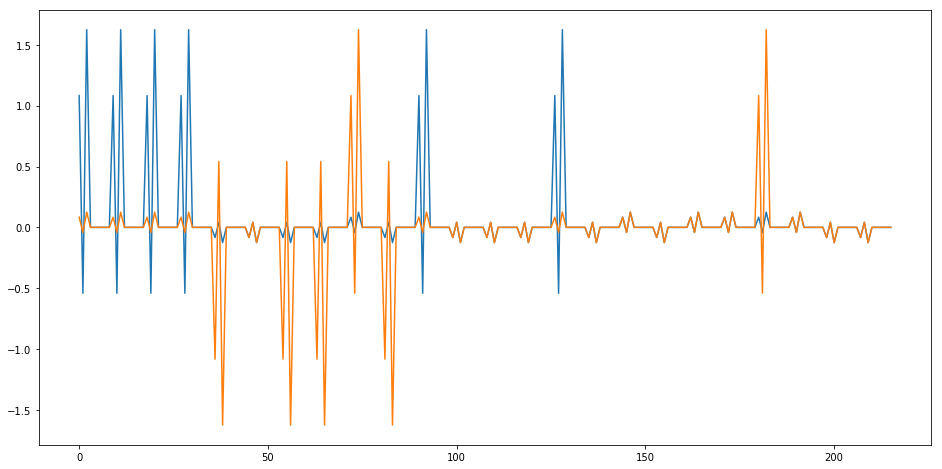

In [44]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
print(x.shape)
ax.plot(x.T[0])
ax.plot(x.T[2])
#[ax.plot(xi) for xi in x.T]

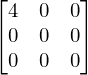

In [45]:
s, t = sympy.symbols('s t')
one = sympy.S(1)
zero = sympy.S(0)
xi = sympy.Matrix([-one, s, t])
n = sympy.Matrix([-one, zero, zero])
sig = [[one, zero, zero],\
       [zero, zero, zero],\
       [zero, zero, zero]]

intxi = sympy.integrate(sympy.integrate(xi, (s, -1, 1)), (t, -1, 1))

t = [zero for _ in range(3)]

for i in range(3):
    for j in range(3):
        t[i] += n[j]*sig[j][i]

ct = [[zero for _ in range(3)] for __ in range(3)]

for i in range(3):
    for j in range(3):
        ct[i][j] = t[i]*intxi[j]
        
sympy.Matrix(ct)


In [46]:
mean_hostress = np.array(filter_result[1][1].gauss_point_info.ho_stress).mean(0)
std_hostress = np.array(filter_result[1][1].gauss_point_info.ho_stress).std(0)
print(mean_hostress)
print(std_hostress)

[0.00364756 0.01134759 0.00894981 0.01048276 0.00625548 0.00681909
 0.00968424 0.0052517  0.00609055 0.00623185 0.02028763 0.01591569
 0.01907415 0.01081243 0.01164032 0.01694697 0.00918269 0.01089314
 0.00588199 0.0190977  0.01499291 0.01808825 0.01025936 0.01097077
 0.01585267 0.00860582 0.01027016]
[1.71015978e-04 2.07780067e-04 3.66267875e-05 1.73240533e-04
 2.26068539e-04 2.92436870e-04 3.57437326e-05 3.20468095e-05
 1.27685609e-04 1.41219295e-04 1.17250690e-04 9.23382022e-05
 8.29296238e-05 2.15004254e-04 3.18156356e-04 1.21459785e-04
 2.89185658e-05 9.18176037e-05 2.02366647e-05 5.54704200e-05
 9.75440726e-05 7.83367251e-05 5.87245676e-05 9.78120743e-05
 1.17879003e-04 2.86231729e-05 3.02311486e-05]


In [47]:
nodes = np.array([[3.13443, -0.61357, 1.90472],\
                  [4.24588, 1.41151, 3.82988],\
                  [3.97724, 1.34621, 4.43285],\
                  [2.86579, -0.678866, 2.50769],\
                  [3.95241, -0.996794, 1.71353],\
                  [5.06385, 1.02829, 3.63869],\
                  [4.79521, 0.96299, 4.24166],\
                  [3.68377, -1.06209, 2.3165]])

l1 = nodes[1] - nodes[0]
l2 = nodes[4] - nodes[0]

n1 = np.cross(l1, l2)/np.linalg.norm(np.cross(l1, l2))

l2 = nodes[2] - nodes[1]
l3 = nodes[5] - nodes[1]

n2 = np.cross(l2, l3)/np.linalg.norm(np.cross(l2, l3))

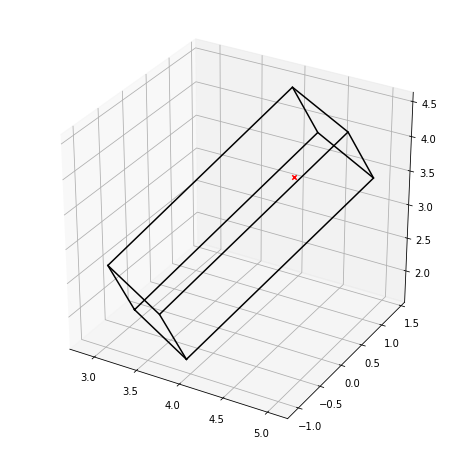

In [48]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

bottom = np.vstack([nodes[:4], nodes[0]])
ax.plot(*zip(*bottom), color='k')

top = np.vstack([nodes[4:], nodes[4]])
ax.plot(*zip(*top), color='k')

for i in range(4):
    edge = np.vstack([nodes[0+i], nodes[4+i]])
    ax.plot(*zip(*edge), color='k')
    
com = [4.38002, 0.56885, 3.65742]
ax.scatter(com[0], com[1], com[2], marker='x', color='r')